In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
data = { 
    "Math_Score": [65, 78, 82, 90, 72, 85, 68, 105, 79, 81],
    "Reading_Score": [80, 88, 92, 95, 84, 89, 77, 98, 83, 86],
    "Writing_Score": [70, 83, 87, 90, 78, 'Na', 72, 95, 80, 82],  # Here 'Na' is introduced is null value
    "Placement_Score": [82, 90, 95, 100, 87, 92, 80, 100, 85, 88],
    "Club join year": [2019,2019,2021,2018,2019,2020,2018,2020,2018,2021]
}
# Convert the Dictionary of lists into Dataframe i.e create the dataset
df = pd.DataFrame(data)

In [88]:
df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club join year
0,65,80,70,82,2019
1,78,88,83,90,2019
2,82,92,87,95,2021
3,90,95,90,100,2018
4,72,84,78,87,2019
5,85,89,Na,92,2020
6,68,77,72,80,2018
7,105,98,95,100,2020
8,79,83,80,85,2018
9,81,86,82,88,2021


In [89]:
df.replace( 'Na', np.nan, inplace = True)


In [90]:
df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club join year
0,65,80,70.0,82,2019
1,78,88,83.0,90,2019
2,82,92,87.0,95,2021
3,90,95,90.0,100,2018
4,72,84,78.0,87,2019
5,85,89,NaN,92,2020
6,68,77,72.0,80,2018
7,105,98,95.0,100,2020
8,79,83,80.0,85,2018
9,81,86,82.0,88,2021


In [91]:
df.isnull()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club join year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,True,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [92]:
 # Step1 Scan for missing Value
df.isnull().sum()

Math_Score         0
Reading_Score      0
Writing_Score      1
Placement_Score    0
Club join year     0
dtype: int64

In [93]:
# Step 2 Handel Missing Value
# Fill null value with the mean of that column  note: this is for numerical column
# can aslo drop the row by df.dropna('Writing_Score')
df['Writing_Score'].fillna(df['Writing_Score'].mean(),inplace =  True) # Value Filled by mean 
df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club join year
0,65,80,70.000000,82,2019
1,78,88,83.000000,90,2019
2,82,92,87.000000,95,2021
3,90,95,90.000000,100,2018
4,72,84,78.000000,87,2019
5,85,89,81.888889,92,2020
6,68,77,72.000000,80,2018
7,105,98,95.000000,100,2020
8,79,83,80.000000,85,2018
9,81,86,82.000000,88,2021


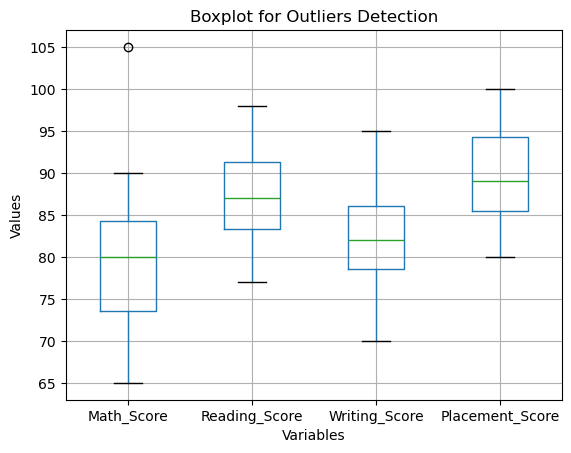

In [94]:
# Step 3 Detect Outlier using box plot
col = ['Math_Score','Reading_Score','Writing_Score','Placement_Score']
df.boxplot(col)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Boxplot for Outliers Detection")
plt.show()
# using the Z-Score 
#from scipy.stats import zscore
#data['Math_Score_Zscore'] = zscore(data['Math_Score'])
#data
# Using Quantile method
#Q1 = df['Math_Score'].quantile(0.25)
#Q3 = df['Math_Score'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#pper_bound = Q3 + 1.5 * IQR

#print("Outliers based on IQR:")
#print(df[(df['Math_Score'] < lower_bound) | (df['Math_Score'] > upper_bound)])


In [95]:
print(df['Math_Score'].iloc[np.where(df['Math_Score']>90)])

7    105
Name: Math_Score, dtype: int64


In [96]:
#Step 4: Handle the outliers
#Removal: Removing a single data point might not be significant in this dataset size (10 rows).
#However, consider if there's a reason to believe it's an error.
# Or Replace Outliers by mean and median inputation
mean_values = df.mean()
# Define threshold for outliers (e.g., 1.5 times IQR)

threshold = 1.5

# Replace outliers with mean

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    df[col] = df[col].apply(lambda x: mean_values[col] if x < lower_bound or x > upper_bound else x)

print("Data with outliers replaced by mean:")
print(df)

Data with outliers replaced by mean:
   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club join year
0        65.0             80      70.000000               82            2019
1        78.0             88      83.000000               90            2019
2        82.0             92      87.000000               95            2021
3        90.0             95      90.000000              100            2018
4        72.0             84      78.000000               87            2019
5        85.0             89      81.888889               92            2020
6        68.0             77      72.000000               80            2018
7        80.5             98      95.000000              100            2020
8        79.0             83      80.000000               85            2018
9        81.0             86      82.000000               88            2021


In [97]:
# Step 5 Data Transformation
# 1. Scaling of variable Club join year to Duration
max_year = df['Club join year'].max()
df['Duration'] = max_year - df['Club join year']
print("Duration")
df

Duration


,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club join year,Duration
0,65.0,80,70.000000,82,2019,2
1,78.0,88,83.000000,90,2019,2
2,82.0,92,87.000000,95,2021,0
3,90.0,95,90.000000,100,2018,3
4,72.0,84,78.000000,87,2019,2
5,85.0,89,81.888889,92,2020,1
6,68.0,77,72.000000,80,2018,3
7,80.5,98,95.000000,100,2020,1
8,79.0,83,80.000000,85,2018,3
9,81.0,86,82.000000,88,2021,0


In [98]:
#2. Convert non linear to relation to linear
# Apply square root transformation to 'Test_Score' to reduce skewness
df['Transformed_Placement_Score'] = np.sqrt(df['Placement_Score'])

# Display the modified dataset
print(df)



   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club join year  \
0        65.0             80      70.000000               82            2019   
1        78.0             88      83.000000               90            2019   
2        82.0             92      87.000000               95            2021   
3        90.0             95      90.000000              100            2018   
4        72.0             84      78.000000               87            2019   
5        85.0             89      81.888889               92            2020   
6        68.0             77      72.000000               80            2018   
7        80.5             98      95.000000              100            2020   
8        79.0             83      80.000000               85            2018   
9        81.0             86      82.000000               88            2021   

   Duration  Transformed_Placement_Score  
0         2                     9.055385  
1         2                     9

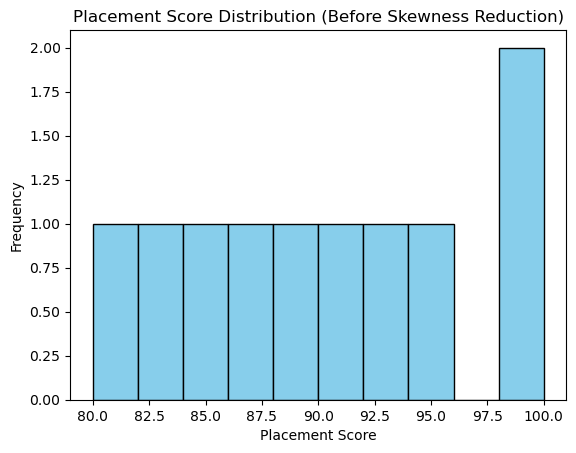

In [99]:
#3. Skewness reduction
# Plot histogram of 'Placement_Score' before skewness reduction
plt.hist(df['Placement_Score'],  color='skyblue', edgecolor='black')
plt.title('Placement Score Distribution (Before Skewness Reduction)')
plt.xlabel('Placement Score')
plt.ylabel('Frequency')
plt.show()



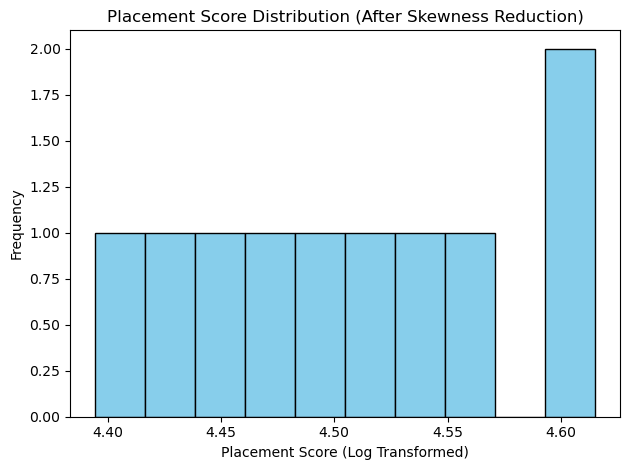

In [100]:
df['Placement_Score'] = np.log1p(df['Placement_Score'])

# We can add additional oultliers to notice difference
#df['Placement_Score'] = np.append(df['Placement_Score'],[150,160,180] )



# Plot histogram of 'Placement_Score' after skewness reduction
plt.hist(df['Placement_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Placement Score Distribution (After Skewness Reduction)')
plt.xlabel('Placement Score (Log Transformed)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
#not significantly skewed so not much difference